In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE


In [1]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# load the dataset
df = pd.read_csv("Customer Conversion Prediction - Customer Conversion Prediction.csv")

# one-hot encode categorical variables
ohe = OneHotEncoder(sparse=False)
job_encoded = ohe.fit_transform(df[["job"]])
job_encoded_df = pd.DataFrame(job_encoded, columns=["job_" + str(i) for i in range(job_encoded.shape[1])])
df = pd.concat([df, job_encoded_df], axis=1)
df = df.drop("job", axis=1)

# label encode other categorical variables
le = LabelEncoder()
df["marital"] = le.fit_transform(df["marital"])
df["education_qual"] = le.fit_transform(df["education_qual"])
df["call_type"] = le.fit_transform(df["call_type"])
df["mon"] = le.fit_transform(df["mon"])
df["prev_outcome"] = le.fit_transform(df["prev_outcome"])
df["y"] = le.fit_transform(df["y"])

# split the data into training and testing sets
X = df.drop("y", axis=1)
y = df["y"]

# oversample the minority class using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# normalize numerical variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create the model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the test data and evaluate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load the dataset
df = pd.read_csv("Customer Conversion Prediction - Customer Conversion Prediction.csv")

# one-hot encode categorical variables
ohe = OneHotEncoder(sparse=False)
job_encoded = ohe.fit_transform(df[["job"]])
job_encoded_df = pd.DataFrame(job_encoded, columns=["job_" + str(i) for i in range(job_encoded.shape[1])])
df = pd.concat([df, job_encoded_df], axis=1)
df = df.drop("job", axis=1)

# label encode other categorical variables
le_marital = LabelEncoder()
df["marital"] = le_marital.fit_transform(df["marital"])
job_qual = LabelEncoder()
df["education_qual"] = job_qual.fit_transform(df["education_qual"])
call_type = LabelEncoder()
df["call_type"] = call_type.fit_transform(df["call_type"])
mon = LabelEncoder()
df["mon"] = mon.fit_transform(df["mon"])
prev_outcome = LabelEncoder()
df["prev_outcome"] = prev_outcome.fit_transform(df["prev_outcome"])
df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)


# split the data into training and testing sets
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize numerical variables

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create the model and fit it to the training data
model = RandomForestClassifier(class_weight="balanced")
model.fit(X_train, y_train)

# make predictions on the test data and evaluate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8991485126617274


In [ ]:
# make predictions on the test data and evaluate the AUROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,plot_roc_curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_proba)
print("AUROC:", auroc)

AUROC: 0.9141303480829983


c:\Users\WARRIOR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


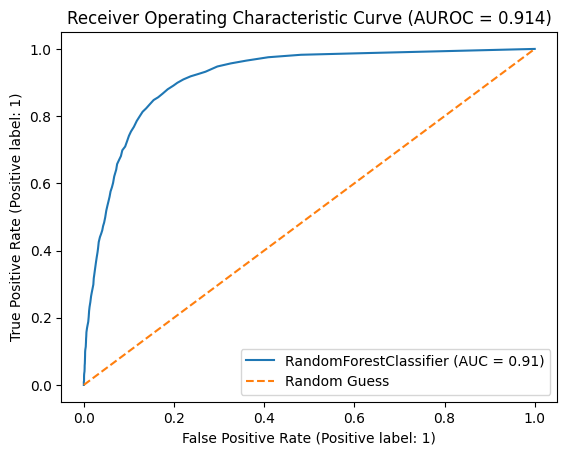

In [ ]:
# plot the ROC curve
plot_roc_curve(model, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.title("Receiver Operating Characteristic Curve (AUROC = {:.3f})".format(auroc))
plt.legend()
plt.show()

In [ ]:
import joblib




# save the model and encoders as .pkl files
joblib.dump(model, "saved/model.pkl")
joblib.dump(le_marital, "saved/le_marital.pkl")
joblib.dump(job_qual, "saved/job_qual.pkl")
joblib.dump(call_type, "saved/call_type.pkl")
joblib.dump(mon, "saved/mon.pkl")
joblib.dump(prev_outcome, "saved/prev_outcome.pkl")

['saved/prev_outcome.pkl']

In [ ]:
X.columns

Index(['age', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'job_0', 'job_1', 'job_2', 'job_3',
       'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
       'job_11'],
      dtype='object')

In [ ]:
model = joblib.load("saved/model.pkl")
scaler = joblib.load("saved/scaler.pkl")
ohe = joblib.load("saved/ohe.pkl")
le_marital = joblib.load("saved/le_marital.pkl")
job_qual = joblib.load("saved/job_qual.pkl")
le_call = joblib.load("saved/call_type.pkl")
mon = joblib.load("saved/mon.pkl")
prev_outcome = joblib.load("saved/prev_outcome.pkl")

In [ ]:
input_df = pd.DataFrame({
            "age": [31],
            "job": ["management"],
            "marital": ["single"],
            "education_qual": ["unknown"],
            "call_type": ["unknown"],
            "day": [21],
            "mon": ["jun"],
            "dur": [2],
            "num_calls": [12],
            "prev_outcome": ["unknown"]
        })

In [ ]:
input_df["marital"] = le_marital.transform(input_df["marital"])
input_df["education_qual"] = job_qual.transform(input_df["education_qual"])
input_df["call_type"] = le_call.transform(input_df["call_type"])
input_df["mon"] = mon.transform(input_df["mon"])
input_df["prev_outcome"] = prev_outcome.transform(input_df["prev_outcome"])
input_encoded = ohe.transform(input_df[["job"]])
input_encoded_df = pd.DataFrame(input_encoded, columns=["job_" + str(i) for i in range(input_encoded.shape[1])])
input_df = pd.concat([input_df, input_encoded_df], axis=1)
input_df = input_df.drop("job", axis=1)


In [ ]:
input_df

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,job_0,...,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11
0,31,2,3,2,21,6,2,12,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,job_0,...,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11
0,58,1,2,2,5,8,261,1,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,2,1,2,5,8,151,1,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,1,1,2,5,8,76,1,3,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,1,3,2,5,8,92,1,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,2,3,2,5,8,198,1,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,2,0,17,9,977,3,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,71,0,0,0,17,9,456,2,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,72,1,1,0,17,9,1127,5,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,57,1,1,1,17,9,508,4,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 ans = model.predict(input_df)

In [ ]:
ans

array([0], dtype=int64)

In [ ]:
ans[0]

0